# **THE PROMOTION PARADOX:**
### *Fixing Biased Talent Promotion Decisions Through Data-Driven HR Analytics*

**Final project by Syntax Society**
- Bayu Maitra
- Dian Ulhaq
- Febiansyah Ahnaf
- Keisya Nisrina Aulia
- Maslahatul Husna

# **IMPORT TOOLS & LOAD DATASET**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler

rcParams['figure.figsize'] = (15, 5)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_project_kelompok_1/dataset/Rakamin Bootcamp - Dataset - Promotion Dataset.csv')


In [ ]:
df_notes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_project_kelompok_1/dataset/Rakamin Bootcamp - Dataset - Promotion Dictionary.csv') # import dataset description

# **DATASET CHARACTERISTIC**

In [ ]:
df.shape # check data characteristics

(1000, 10)

In [ ]:
df_notes # check columns description

,Kolom,Deskripsi
0,Employee_ID,ID unik untuk tiap karyawan
1,Age,Usia karyawan (terdapat missing & anomali)
2,Years_at_Company,Lama bekerja di perusahaan (tahun)
3,Performance_Score,Skor performa tahunan (1–5)
4,Leadership_Score,Skor kepemimpinan (0–100)
5,Training_Hours,Jumlah jam pelatihan yang diikuti karyawan
6,Projects_Handled,Jumlah proyek yang pernah ditangani
7,Peer_Review_Score,Skor penilaian rekan kerja (0–100)
8,Current_Position_Level,"Level jabatan saat ini (Junior, Mid, Senior, L..."
9,Promotion_Eligible,"Label target: 1 = eligible dipromosikan, 0 = t..."


In [ ]:
df.info() # checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Employee_ID             1000 non-null   object 
 1   Age                     950 non-null    float64
 2   Years_at_Company        951 non-null    float64
 3   Performance_Score       950 non-null    float64
 4   Leadership_Score        950 non-null    float64
 5   Training_Hours          950 non-null    float64
 6   Projects_Handled        950 non-null    float64
 7   Peer_Review_Score       950 non-null    float64
 8   Current_Position_Level  950 non-null    object 
 9   Promotion_Eligible      950 non-null    float64
dtypes: float64(8), object(2)
memory usage: 78.3+ KB


In [ ]:
df.describe() # descriptive statistics

,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Promotion_Eligible
count,950.000000,951.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,40.940000,14.968454,2.969474,50.117895,109.286316,10.016842,51.227368,0.294737
std,12.863864,9.319084,1.417977,28.668058,184.616517,5.666507,29.141002,0.456165
min,-3.000000,-5.000000,1.000000,0.000000,-50.000000,0.000000,0.000000,0.000000
25%,31.000000,7.000000,2.000000,25.000000,51.250000,5.000000,25.000000,0.000000
50%,41.000000,15.000000,3.000000,51.000000,102.500000,10.000000,51.000000,0.000000
75%,50.000000,23.000000,4.000000,75.000000,150.750000,15.000000,78.000000,1.000000
max,200.000000,100.000000,5.000000,99.000000,5000.000000,19.000000,99.000000,1.000000


In [ ]:
# separate numerical and categorical columns

nums = ['Age', 'Years_at_Company', 'Performance_Score', 'Leadership_Score',
       'Training_Hours', 'Projects_Handled', 'Peer_Review_Score', 'Promotion_Eligible']
cats = ['Employee_ID', 'Current_Position_Level']

In [ ]:
df[cats].describe() # check categorica columns statistic

,Employee_ID,Current_Position_Level
count,1000,950
unique,1000,4
top,EMP1000,Mid
freq,1,248


## **Dataset summary**

1.	The dataset contains 1,000 rows and 10 columns.
2.	There are 8 numerical features and 2 categorical features.
3.	The distributions show a slight right skew, though the effect is minimal.



# **EDA**

## **Data quality**

### **Duplicate**

In [ ]:
df.duplicated().any() # checking duplicates

np.False_

### **Missing values**

In [ ]:
df.isna().sum() # checking missing values

,0
Employee_ID,0
Age,50
Years_at_Company,49
Performance_Score,50
Leadership_Score,50
Training_Hours,50
Projects_Handled,50
Peer_Review_Score,50
Current_Position_Level,50
Promotion_Eligible,50


In [ ]:
total_missing_pct = df.isna().sum().sum() / df.size * 100 # percentage of overall missing values
total_missing_pct

np.float64(4.49)

### **Outliers**

In [ ]:
# pilih kolom numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_summary[col] = {
        'outlier_count': outliers.shape[0],
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

pd.DataFrame(outlier_summary).T

,outlier_count,lower_bound,upper_bound
Age,4.0,2.5,78.5
Years_at_Company,2.0,-17.0,47.0
Performance_Score,0.0,-1.0,7.0
Leadership_Score,0.0,-50.0,150.0
Training_Hours,4.0,-98.0,300.0
Projects_Handled,0.0,-10.0,30.0
Peer_Review_Score,0.0,-54.5,157.5
Promotion_Eligible,0.0,-1.5,2.5


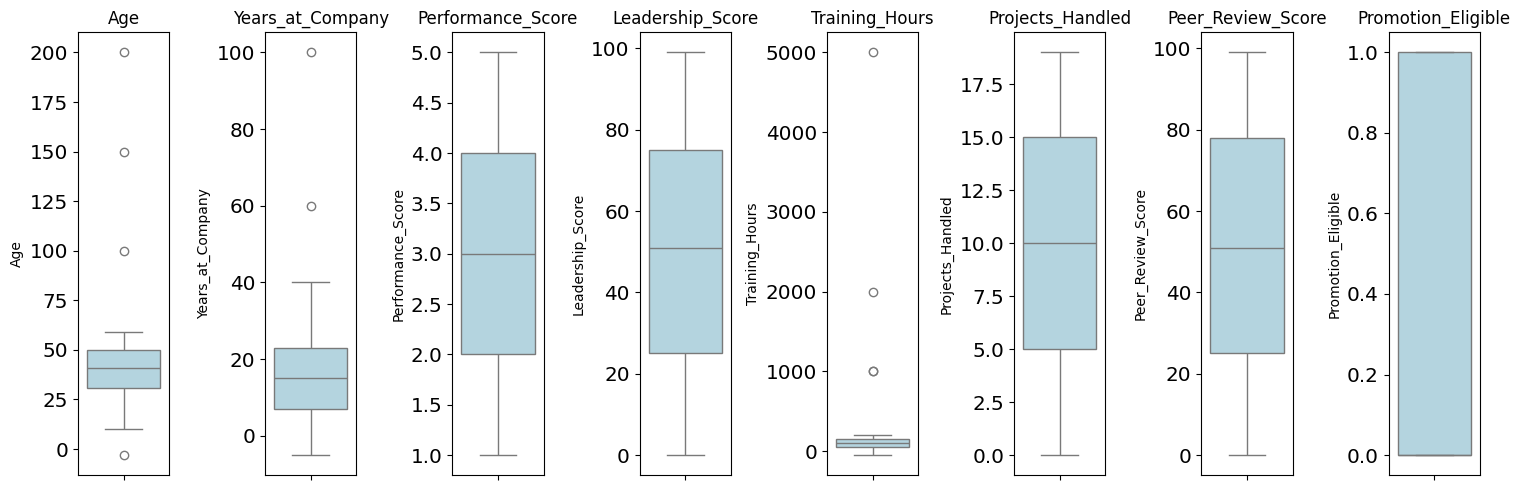

In [ ]:
# nums columns distribution

features = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 5))
for i in range(len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y=df[features[i]], color='lightblue', orient='v')
    plt.title(features[i])
    plt.tight_layout()

plt.show()


**Notes:** Based on the visualization, there are very high values (outliers) in three columns, namely Age, Years_at_Company and Training_Hours.

In [ ]:
df['Age'].sort_values(ascending=False).head(10) # check max age

,Age
774,200.0
303,150.0
997,100.0
903,59.0
933,59.0
929,59.0
289,59.0
324,59.0
270,59.0
54,59.0


In [ ]:
df['Age'].sort_values(ascending=True).head(10) # check min age

,Age
48,-3.0
371,10.0
652,22.0
991,22.0
664,22.0
513,22.0
525,22.0
646,22.0
770,22.0
435,22.0


**Notes:** There are implausible values in column Age. 3 talents are >100 years of age, 1 talent is 10 years old, and 1 talent is -3 years old.

In [ ]:
df['Years_at_Company'].sort_values(ascending=False).head(10) # check max YAC

,Years_at_Company
923,100.0
290,60.0
97,40.0
450,29.0
60,29.0
583,29.0
440,29.0
86,29.0
77,29.0
589,29.0


In [ ]:
df['Years_at_Company'].sort_values(ascending=True).head(10) # check min YAC

,Years_at_Company
623,-5.0
940,0.0
442,0.0
594,0.0
905,0.0
911,0.0
904,0.0
700,0.0
382,0.0
726,0.0


**Notes:** There are implausible values in column Years_at_Company. 2 talents has >50 years at company, 1 talent has -5 years at company.

In [ ]:
df['Training_Hours'].sort_values(ascending=False).head(10) # check max training hours

,Training_Hours
925,5000.0
393,2000.0
378,1000.0
849,999.0
954,199.0
548,199.0
183,199.0
367,199.0
536,199.0
594,199.0


In [ ]:
df['Training_Hours'].sort_values(ascending=True).head(10) # check min training hours

,Training_Hours
344,-50.0
510,0.0
136,0.0
553,0.0
844,1.0
707,1.0
369,1.0
747,1.0
196,1.0
637,2.0


**Notes:** There are implausible values in column Training_Hours. 4 talents has >900 hours training hours, 1 talent has -50 training hours.

In [ ]:
years_anomaly = df[(df['Years_at_Company'] < 0) | (df['Years_at_Company'] > 50)] # Checking YAC anomaly
years_anomaly[['Employee_ID', 'Years_at_Company']]


,Employee_ID,Years_at_Company
290,EMP0291,60.0
623,EMP0624,-5.0
923,EMP0924,100.0


In [ ]:
training_anomaly = df[(df['Training_Hours'] < 0) | (df['Training_Hours'] > 200)] # Check Training_Hours anomaly
training_anomaly[['Employee_ID', 'Training_Hours']]


,Employee_ID,Training_Hours
344,EMP0345,-50.0
378,EMP0379,1000.0
393,EMP0394,2000.0
849,EMP0850,999.0
925,EMP0926,5000.0


In [ ]:
age_anomaly = df[(df['Age'] < 18) | (df['Age'] > 65)] # Check Age anomaly
age_anomaly[['Employee_ID', 'Age']]

,Employee_ID,Age
48,EMP0049,-3.0
303,EMP0304,150.0
371,EMP0372,10.0
774,EMP0775,200.0
997,EMP0998,100.0


In [ ]:
# Total anomaly
outlier_summary = {"Age": len(age_anomaly),
                "Years_at_Company": len(years_anomaly),
                "Training_Hours": len(training_anomaly)}

total_outlier = pd.concat([age_anomaly, years_anomaly, training_anomaly])['Employee_ID'].nunique()

Outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Feature', 'Jumlah Outlier'])
Outlier_df['Persentase Outlier (%)'] = round(Outlier_df['Jumlah Outlier'] / len(df) * 100, 2)
Outlier_df.loc[len(Outlier_df)] = ['TOTAL', total_outlier, round(total_outlier / len(df) * 100, 2)]
Outlier_df


,Feature,Jumlah Outlier,Persentase Outlier (%)
0,Age,5,0.5
1,Years_at_Company,3,0.3
2,Training_Hours,5,0.5
3,TOTAL,13,1.3


### **Anomaly**

In [ ]:
# Check YAC > Age

df[df['Years_at_Company'] > df['Age']] # Check YAC > Age

,Employee_ID,Age,Years_at_Company,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Current_Position_Level,Promotion_Eligible
35,EMP0036,22.0,24.0,1.0,30.0,31.0,14.0,53.0,Lead,0.0
48,EMP0049,-3.0,20.0,1.0,82.0,196.0,7.0,64.0,Senior,0.0
60,EMP0061,23.0,29.0,5.0,14.0,153.0,1.0,60.0,NaN,0.0
94,EMP0095,23.0,29.0,1.0,60.0,120.0,3.0,82.0,Lead,0.0
96,EMP0097,26.0,27.0,1.0,89.0,93.0,5.0,14.0,Junior,1.0
116,EMP0117,23.0,27.0,4.0,52.0,132.0,8.0,2.0,Lead,0.0
136,EMP0137,24.0,26.0,5.0,25.0,0.0,3.0,89.0,Junior,0.0
163,EMP0164,24.0,28.0,4.0,73.0,30.0,12.0,72.0,Senior,0.0
170,EMP0171,24.0,26.0,5.0,24.0,103.0,9.0,73.0,Mid,0.0
174,EMP0175,25.0,28.0,5.0,38.0,65.0,4.0,69.0,Mid,0.0


In [ ]:
(df['Years_at_Company'] > df['Age']).sum() # Total YAV > Age

np.int64(41)

In [ ]:
# Check if there are employee under 18

mask_age_gap = (df["Age"] - df["Years_at_Company"]) < 18
subset = df[mask_age_gap]

# Total row
count_age_gap = subset.shape[0]
print(subset[['Employee_ID', 'Age', 'Years_at_Company']].head(5))
print("Total Age - Years_at_Company < 18:", count_age_gap)

   Employee_ID   Age  Years_at_Company
0      EMP0001  24.0              21.0
3      EMP0004  39.0              24.0
13     EMP0014  36.0              24.0
16     EMP0017  38.0              27.0
17     EMP0018  26.0              15.0
Total Age - Years_at_Company < 18: 255


## **Data cleaning**

In [ ]:
# Count total outliers

outlier_clean = pd.concat([age_anomaly, years_anomaly, training_anomaly])['Employee_ID'].unique()
len(outlier_clean)


13

In [ ]:
# Drop outliers

df_clean = df[~df['Employee_ID'].isin(outlier_clean)].reset_index(drop=True)

print("Dataset with outliers:", len(df))
print("Dataset without outliers:", len(df_clean))
print("Data dropped:", len(df) - len(df_clean))


Dataset with outliers: 1000
Dataset without outliers: 987
Data dropped: 13


In [ ]:
# Count missing values before dan after

missing_before = df_clean.isna().sum()
total_missing_before = missing_before.sum()


# Imputation with median and mode

for col in df_clean.select_dtypes(include=['float64']).columns:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)


for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)


missing_after = df_clean.isna().sum()
total_missing_after = missing_after.sum()


# join
missing_table = pd.concat(
    [missing_before, missing_after], axis=1, keys=['Before imputation', 'After imputation']
).reset_index()

missing_table.rename(columns={'index': 'Feature'}, inplace=True)


# Add total
total_row = pd.DataFrame({
    'Feature': ['TOTAL'],
    'Before imputation': [total_missing_before],
    'After imputation': [total_missing_after]
})

missing_table = pd.concat([missing_table, total_row], ignore_index=True)

print("Missing values before and after cleaning:")
display(missing_table)


Missing values before and after cleaning:


,Feature,Before imputation,After imputation
0,Employee_ID,0,0
1,Age,48,0
2,Years_at_Company,49,0
3,Performance_Score,50,0
4,Leadership_Score,49,0
5,Training_Hours,49,0
6,Projects_Handled,50,0
7,Peer_Review_Score,50,0
8,Current_Position_Level,50,0
9,Promotion_Eligible,49,0


In [ ]:
# Drop Years_at_Company column

df_clean = df_clean.drop(columns=['Years_at_Company'])
df_clean.head()

,Employee_ID,Age,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Current_Position_Level,Promotion_Eligible
0,EMP0001,24.0,2.0,44.0,42.0,19.0,61.0,Junior,0.0
1,EMP0002,50.0,5.0,45.0,66.0,11.0,6.0,Junior,0.0
2,EMP0003,56.0,5.0,19.0,96.0,6.0,86.0,Lead,0.0
3,EMP0004,39.0,4.0,51.0,16.0,6.0,52.0,Senior,0.0
4,EMP0005,41.0,4.0,64.0,57.0,16.0,59.0,Junior,0.0


### **Handling**

1. Outliers has been dropped since the total percentage are very small (1,3%)
2. Missing values handled by imputation method. For categorical columns, we use mode, while in the numerical columns we use median.
3. We decide to drop Years_at_Company column since there are too many anomaly in it. There are 255 implausible data (either the YAC > Age, or Age - YAC < 18).

## **Data analysis**

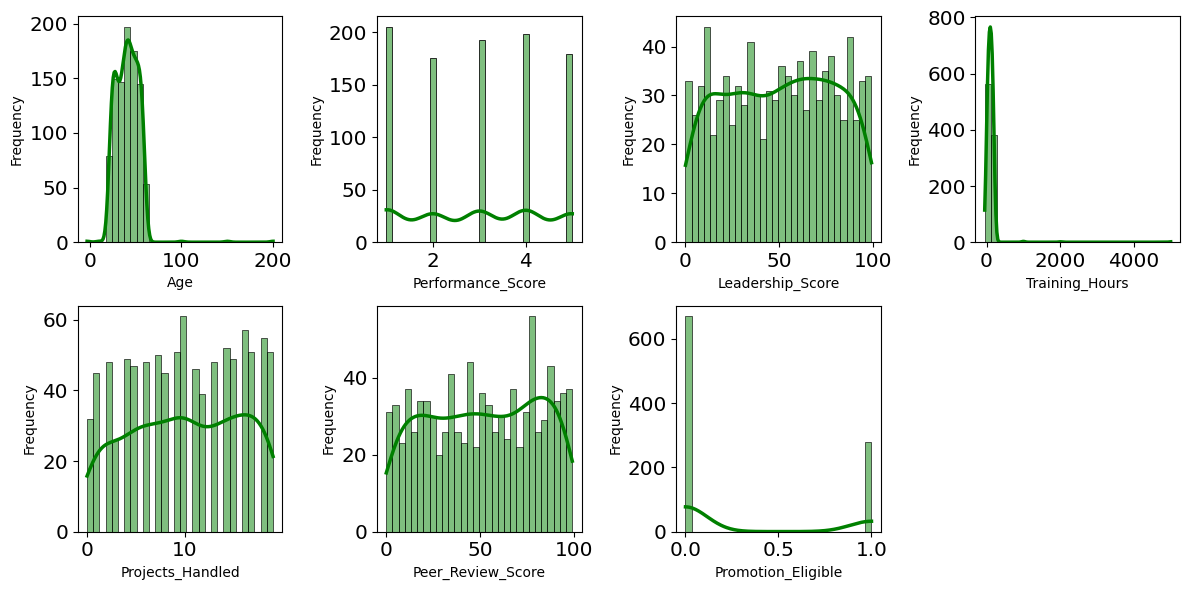

In [ ]:
features = df_clean.select_dtypes(include=['int64', 'float64']).columns


plt.figure(figsize=(12, 6))


for i in range(0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[features[i]], bins=30, kde=True, edgecolor='black', color='green')
    plt.xlabel(features[i])
    plt.ylabel("Frequency")
    plt.tight_layout()
plt.show()


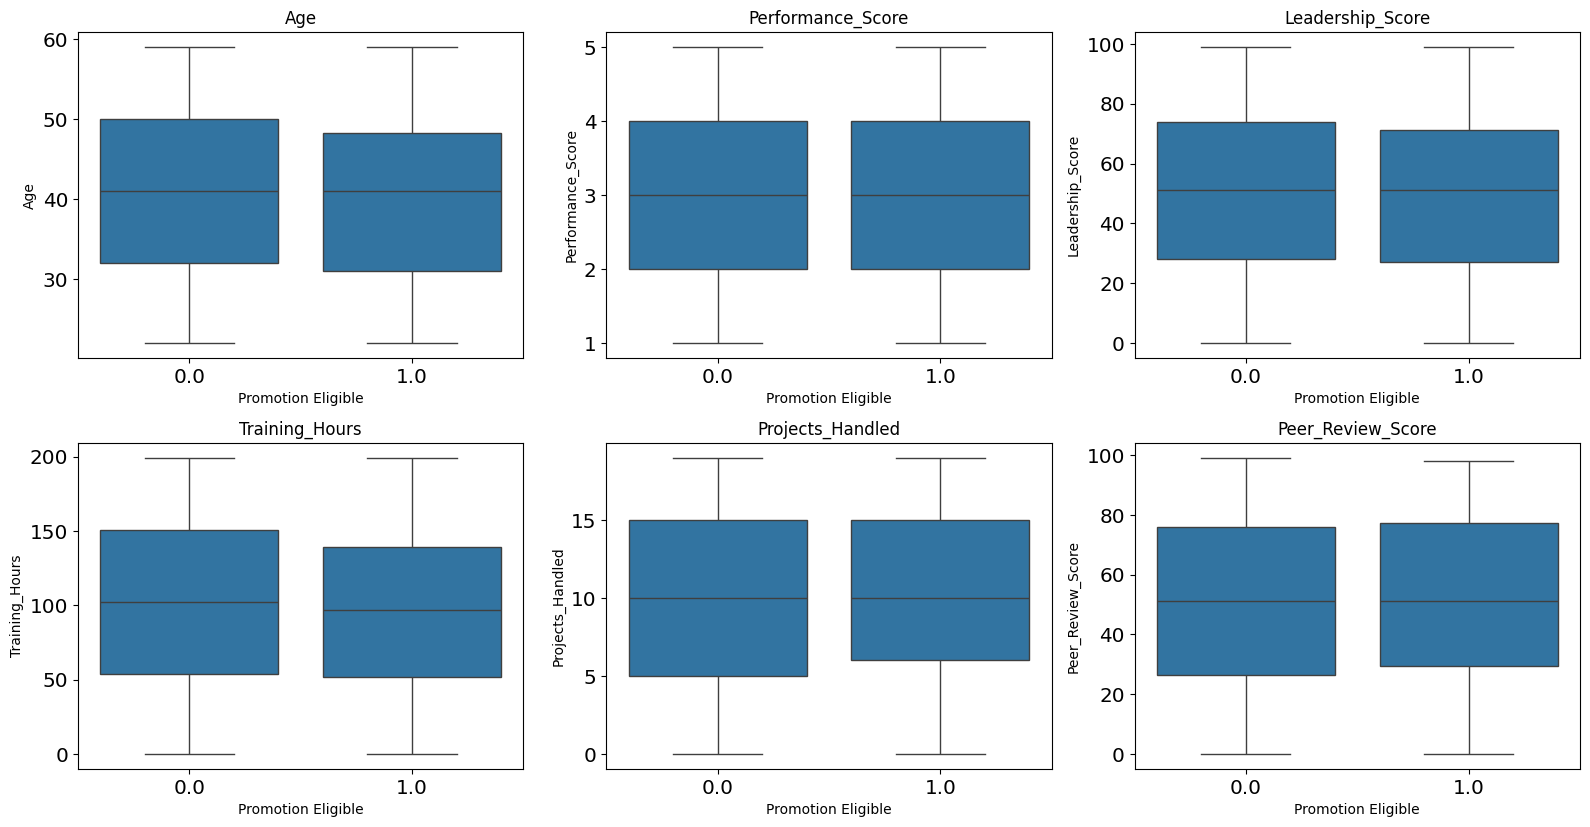

In [ ]:
# bivariate analysis numerical cols vs target

target = 'Promotion_Eligible'

num_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
num_cols = [col for col in num_cols if col != target]

n = len(num_cols)
rows = (n // 3) + 1
cols = 3

plt.figure(figsize=(16, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df_clean[target], y=df_clean[col])
    plt.title(col)
    plt.xlabel("Promotion Eligible")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

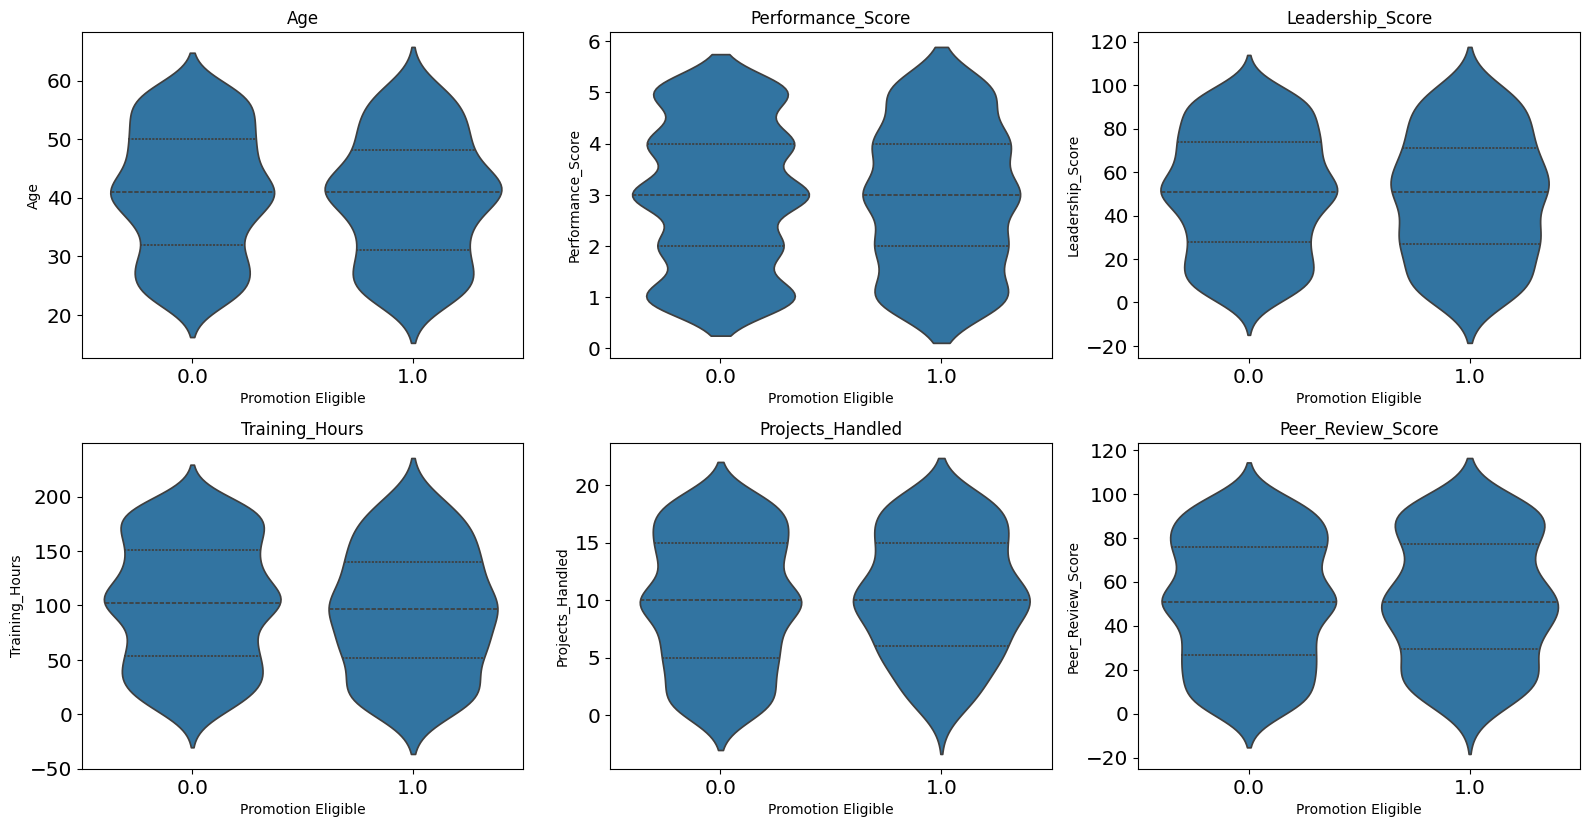

In [ ]:
# numerical vs target in violin

target = 'Promotion_Eligible'

num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col != target]

n = len(num_cols)
rows = (n // 3) + 1
cols = 3

plt.figure(figsize=(16, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.violinplot(x=df_clean[target], y=df_clean[col], inner='quartile')
    plt.title(col)
    plt.xlabel("Promotion Eligible")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

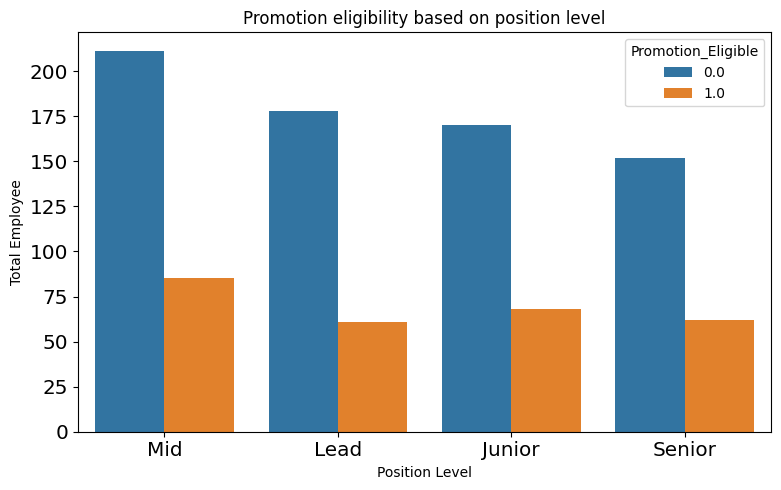

In [ ]:
# promotion eligible per position

plt.subplot(1, 2, 2)
sns.countplot(x='Current_Position_Level', hue='Promotion_Eligible', data=df_clean, order=df_clean['Current_Position_Level'].value_counts().index)
plt.title('Promotion eligibility based on position level')
plt.xlabel('Position Level')
plt.ylabel('Total Employee')
plt.legend(title='Promotion_Eligible')

plt.tight_layout()
plt.show()

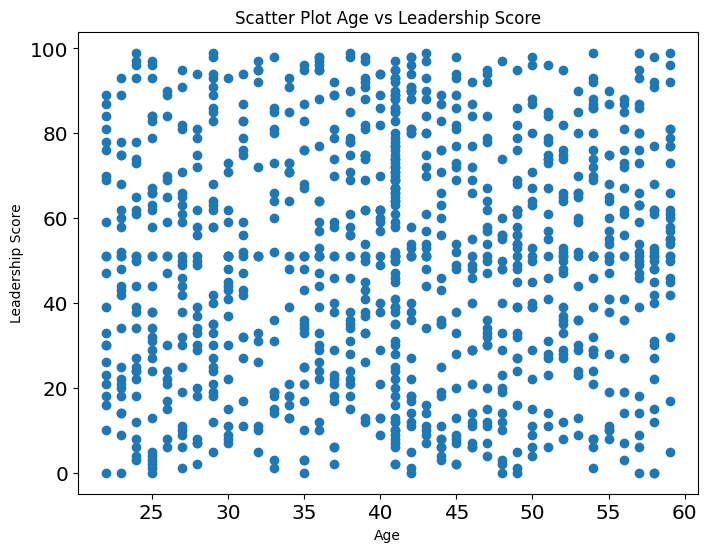

In [ ]:
# check leadership vs Age

plt.figure(figsize=(8,6))
plt.scatter(df_clean['Age'], df_clean['Leadership_Score'])
plt.xlabel('Age')
plt.ylabel('Leadership Score')
plt.title('Scatter Plot Age vs Leadership Score')
plt.show()

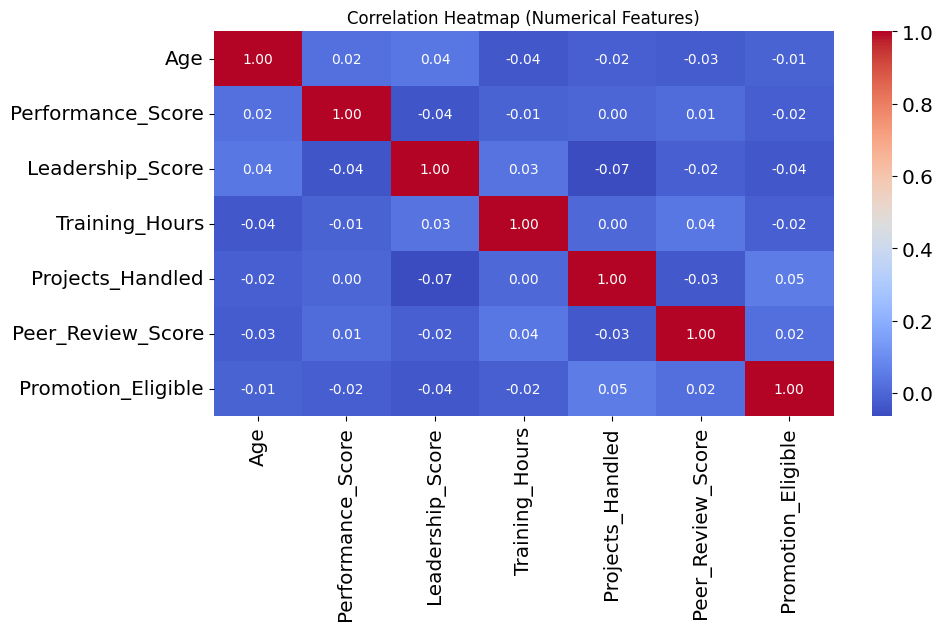

In [ ]:
# Check correlation

features = df_clean.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 5))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

### **Analysis summary**

1.	Most numerical features show a mild positive skew, with values clustering on the lower end.
2.	The target variable (Promotion_Eligible) is imbalanced.
3.	Mid-level employees make up the largest portion of the talent population.
4.	Promotion-eligible employees are also predominantly from the mid-level group.
5.	Age and Leadership_Score do not show any meaningful correlation.
6.	Most features have weak correlation with the target; only Projects_Handled and Peer_Review_Score show moderate positive relationships that may influence promotion decisions.


# **FEATURE SELECTION**

In [ ]:
# Drop low corr columns

df_clean2 = df_clean.drop(columns=['Employee_ID', 'Current_Position_Level', 'Age'])

In [ ]:
df_clean2.sample()

,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Promotion_Eligible
161,4.0,17.0,191.0,16.0,54.0,1.0


In [ ]:
df_clean2.corr()

,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Promotion_Eligible
Performance_Score,1.000000,-0.039287,-0.007353,0.004703,0.014542,-0.021017
Leadership_Score,-0.039287,1.000000,-0.016639,-0.056647,-0.017949,-0.032805
Training_Hours,-0.007353,-0.016639,1.000000,0.009016,-0.009789,-0.059280
Projects_Handled,0.004703,-0.056647,0.009016,1.000000,-0.036964,0.050119
Peer_Review_Score,0.014542,-0.017949,-0.009789,-0.036964,1.000000,0.017827
Promotion_Eligible,-0.021017,-0.032805,-0.059280,0.050119,0.017827,1.000000


### **Feature selection strategy**

1. Dropping non impactful feature, Employee_ID.
2. Dropping low correlation features, such as Age, Current_Position_Level
3. Need to create new features that can reduces bias and boost correlation to target feature.

# **FEATURE ENGINEERING**

In [ ]:
# Create new features

df_clean2['Leadership_Index'] = (
    0.4 * df_clean2['Leadership_Score'] +
    0.6 * df_clean2['Peer_Review_Score']
)
df_clean2['Leadership_Index'] = df_clean2['Leadership_Index'].astype(float)

df_clean2['Performance_Index'] = (
    0.5 * df_clean2['Performance_Score'] +
    0.2 * df_clean2['Projects_Handled'] +
    0.3 * df_clean2['Peer_Review_Score']
)
df_clean2['Performance_Index'] = df_clean2['Performance_Index'].astype(float)

df_raw = df_clean2.copy()

df_raw['Potential_Index'] = (
    0.4 * df_raw['Training_Hours'] +
    0.4 * df_raw['Peer_Review_Score'] +
    0.2 * df_raw['Leadership_Score']
)

df_raw['Growth_Momentum'] = (
    df_raw['Projects_Handled'] / (df_raw['Training_Hours'] + 1)
)

df_raw['Leadership_Influence'] = (
    df_raw['Peer_Review_Score'] / (df_raw['Leadership_Score'] + 1)
)

df_raw['Performance_Consistency'] = (
    df_raw['Performance_Score'] * df_raw['Projects_Handled']
)



In [ ]:
df_raw.sample(5)

,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Promotion_Eligible,Leadership_Index,Performance_Index,Potential_Index,Growth_Momentum,Leadership_Influence,Performance_Consistency
682,2.0,69.0,16.0,7.0,46.0,1.0,55.2,16.2,38.6,0.411765,0.657143,14.0
254,1.0,35.0,193.0,12.0,14.0,0.0,22.4,7.1,89.8,0.061856,0.388889,12.0
574,4.0,96.0,182.0,12.0,22.0,0.0,51.6,11.0,100.8,0.065574,0.226804,48.0
457,3.0,81.0,39.0,7.0,7.0,0.0,36.6,5.0,34.6,0.175000,0.085366,21.0
261,1.0,80.0,55.0,10.0,63.0,0.0,69.8,21.4,63.2,0.178571,0.777778,10.0


In [ ]:
# Check correlation

df_raw.corr()

,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Promotion_Eligible,Leadership_Index,Performance_Index,Potential_Index,Growth_Momentum,Leadership_Influence,Performance_Consistency
Performance_Score,1.000000,-0.039287,-0.007353,0.004703,0.014542,-0.021017,-0.009477,0.095803,-0.008593,-0.014169,0.024091,0.621862
Leadership_Score,-0.039287,1.000000,-0.016639,-0.056647,-0.017949,-0.032805,0.538138,-0.028272,0.195249,0.010383,-0.421600,-0.057538
Training_Hours,-0.007353,-0.016639,1.000000,0.009016,-0.009789,-0.059280,-0.017458,-0.009143,0.871915,-0.410768,-0.015375,0.009432
Projects_Handled,0.004703,-0.056647,0.009016,1.000000,-0.036964,0.050119,-0.062502,0.092491,-0.020765,0.158963,0.054297,0.710746
Peer_Review_Score,0.014542,-0.017949,-0.009789,-0.036964,1.000000,0.017827,0.833062,0.988336,0.430012,0.006393,0.192849,-0.013585
Promotion_Eligible,-0.021017,-0.032805,-0.059280,0.050119,0.017827,1.000000,-0.003122,0.022440,-0.051416,0.094174,0.088464,0.021599
Leadership_Index,-0.009477,0.538138,-0.017458,-0.062502,0.833062,-0.003122,1.000000,0.817518,0.470522,0.011134,-0.070687,-0.043286
Performance_Index,0.095803,-0.028272,-0.009143,0.092491,0.988336,0.022440,0.817518,1.000000,0.423170,0.025668,0.200229,0.128282
Potential_Index,-0.008593,0.195249,0.871915,-0.020765,0.430012,-0.051416,0.470522,0.423170,1.000000,-0.356332,-0.020023,-0.010247
Growth_Momentum,-0.014169,0.010383,-0.410768,0.158963,0.006393,0.094174,0.011134,0.025668,-0.356332,1.000000,-0.013339,0.087369


## **Feature scaling**

In [ ]:
# Feature standarization

df_scaled = df_raw.copy()

target = 'Promotion_Eligible'
num_features = df_scaled.drop(columns=[target]).select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = StandardScaler()

df_scaled[num_features] = scaler.fit_transform(df_scaled[num_features])

df_scaled.head()



,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Promotion_Eligible,Leadership_Index,Performance_Index,Potential_Index,Growth_Momentum,Leadership_Influence,Performance_Consistency
0,-0.701018,-0.220184,-1.035977,1.627892,0.349011,0.0,0.172393,0.499204,-0.805039,0.260405,-0.175344,0.357239
1,1.465699,-0.184340,-0.610027,0.178266,-1.591787,0.0,-1.443855,-1.437583,-1.281323,-0.135183,-0.363274,1.096978
2,1.465699,-1.116279,-0.077591,-0.727750,1.231192,0.0,0.420284,1.245916,0.233415,-0.280955,0.276325,0.009126
3,0.743460,0.030723,-1.497422,-0.727750,0.031426,0.0,0.043490,-0.002494,-1.296939,0.133730,-0.229885,-0.251958
4,0.743460,0.496693,-0.769758,1.084282,0.278437,0.0,0.509525,0.475869,-0.445875,0.023922,-0.244045,1.488605


In [ ]:
df_scaled.corr() # check new features corr

,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Promotion_Eligible,Leadership_Index,Performance_Index,Potential_Index,Growth_Momentum,Leadership_Influence,Performance_Consistency
Performance_Score,1.000000,-0.039287,-0.007353,0.004703,0.014542,-0.021017,-0.009477,0.095803,-0.008593,-0.014169,0.024091,0.621862
Leadership_Score,-0.039287,1.000000,-0.016639,-0.056647,-0.017949,-0.032805,0.538138,-0.028272,0.195249,0.010383,-0.421600,-0.057538
Training_Hours,-0.007353,-0.016639,1.000000,0.009016,-0.009789,-0.059280,-0.017458,-0.009143,0.871915,-0.410768,-0.015375,0.009432
Projects_Handled,0.004703,-0.056647,0.009016,1.000000,-0.036964,0.050119,-0.062502,0.092491,-0.020765,0.158963,0.054297,0.710746
Peer_Review_Score,0.014542,-0.017949,-0.009789,-0.036964,1.000000,0.017827,0.833062,0.988336,0.430012,0.006393,0.192849,-0.013585
Promotion_Eligible,-0.021017,-0.032805,-0.059280,0.050119,0.017827,1.000000,-0.003122,0.022440,-0.051416,0.094174,0.088464,0.021599
Leadership_Index,-0.009477,0.538138,-0.017458,-0.062502,0.833062,-0.003122,1.000000,0.817518,0.470522,0.011134,-0.070687,-0.043286
Performance_Index,0.095803,-0.028272,-0.009143,0.092491,0.988336,0.022440,0.817518,1.000000,0.423170,0.025668,0.200229,0.128282
Potential_Index,-0.008593,0.195249,0.871915,-0.020765,0.430012,-0.051416,0.470522,0.423170,1.000000,-0.356332,-0.020023,-0.010247
Growth_Momentum,-0.014169,0.010383,-0.410768,0.158963,0.006393,0.094174,0.011134,0.025668,-0.356332,1.000000,-0.013339,0.087369


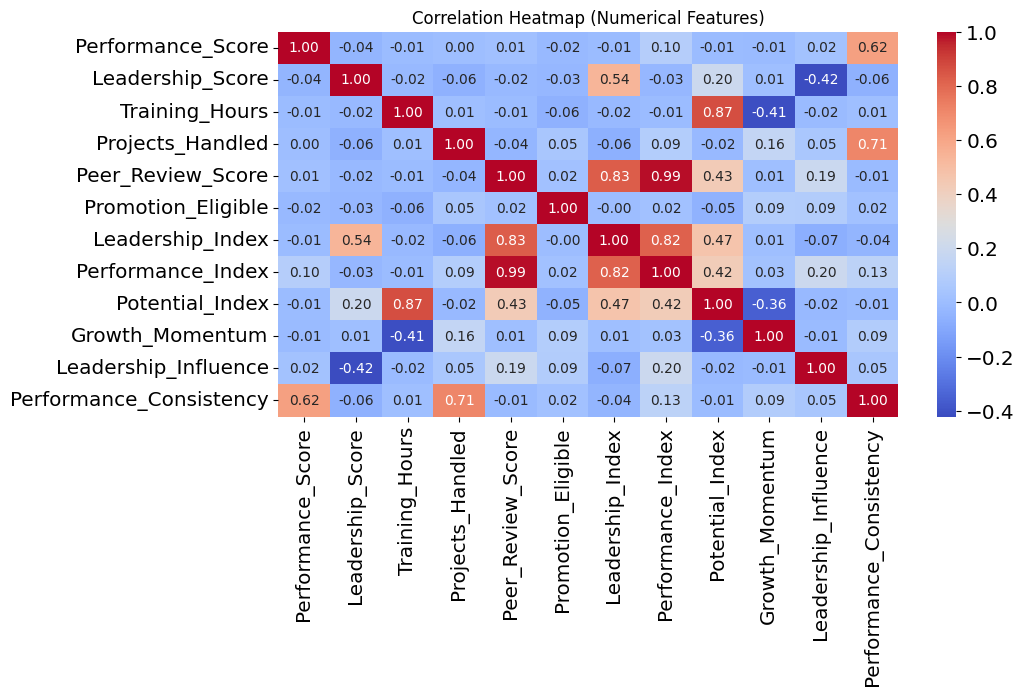

In [ ]:
# heatmap corr

num_cols = df_scaled.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 5))
sns.heatmap(df_scaled[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

## **Create datasets for modeling**

In [ ]:
# Create clean datasets

df_raw.head()


,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Promotion_Eligible,Leadership_Index,Performance_Index,Potential_Index,Growth_Momentum,Leadership_Influence,Performance_Consistency
0,2.0,44.0,42.0,19.0,61.0,0.0,54.2,23.1,50.0,0.441860,1.355556,38.0
1,5.0,45.0,66.0,11.0,6.0,0.0,21.6,6.5,37.8,0.164179,0.130435,55.0
2,5.0,19.0,96.0,6.0,86.0,0.0,59.2,29.5,76.6,0.061856,4.300000,30.0
3,4.0,51.0,16.0,6.0,52.0,0.0,51.6,18.8,37.4,0.352941,1.000000,24.0
4,4.0,64.0,57.0,16.0,59.0,0.0,61.0,22.9,59.2,0.275862,0.907692,64.0


In [ ]:
from google.colab import files
df_raw.to_csv('dataset_clean_unscaled.csv', index=False)
files.download('dataset_clean_unscaled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_scaled.head()

,Performance_Score,Leadership_Score,Training_Hours,Projects_Handled,Peer_Review_Score,Promotion_Eligible,Leadership_Index,Performance_Index,Potential_Index,Growth_Momentum,Leadership_Influence,Performance_Consistency
0,-0.701018,-0.220184,-1.035977,1.627892,0.349011,0.0,0.172393,0.499204,-0.805039,0.260405,-0.175344,0.357239
1,1.465699,-0.184340,-0.610027,0.178266,-1.591787,0.0,-1.443855,-1.437583,-1.281323,-0.135183,-0.363274,1.096978
2,1.465699,-1.116279,-0.077591,-0.727750,1.231192,0.0,0.420284,1.245916,0.233415,-0.280955,0.276325,0.009126
3,0.743460,0.030723,-1.497422,-0.727750,0.031426,0.0,0.043490,-0.002494,-1.296939,0.133730,-0.229885,-0.251958
4,0.743460,0.496693,-0.769758,1.084282,0.278437,0.0,0.509525,0.475869,-0.445875,0.023922,-0.244045,1.488605


In [ ]:
from google.colab import files
df_scaled.to_csv('dataset_clean_scaled.csv', index=False)
files.download('dataset_clean_scaled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **END**

Notes: Modeling will be conducted in different notebook. Check our [online repository](https://github.com/heybayrepo/syntaxsociety)